In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import json
import seaborn as sns

## PROBING

In [2]:
with open(f'C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/predictions/predictions_corr.json', 'r', encoding='utf-8') as f:
    all_results = json.load(f)

In [3]:
data = pd.DataFrame.from_dict(all_results)

In [4]:
real_values = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/probing_data/probing_test.csv")

In [5]:
real_values.head()

,id,sent,category,n_tokens,char_per_tok,upos_dist_DET,upos_dist_ADV,upos_dist_PUNCT,upos_dist_NUM,upos_dist_PRON,...,avg_max_depth,dep_dist_obj,dep_dist_nsubj,subj_pre,subj_post,n_prepositional_chains,avg_prepositional_chain_len,avg_subordinate_chain_len,subordinate_proposition_dist,avg_verb_edges
0,vit_VIT-1574,E anche Catanzaro ha le sue difficoltà.,1,8,4.571429,25.000000,12.500000,12.500000,0.0,0.000000,...,2,12.500000,12.500000,100.0,0.0,0,0.0,0.0,0.0,3.0
1,vit_VIT-418,"Per motivi evidenti, aveva detto qualche ora p...",1,31,4.821429,16.129032,6.451613,9.677419,0.0,0.000000,...,5,0.000000,6.451613,50.0,50.0,2,1.0,1.0,50.0,1.5
2,vit_VIT-5338,Il ritmo di lavoro è blando;,1,7,3.666667,14.285714,0.000000,14.285714,0.0,0.000000,...,3,0.000000,14.285714,100.0,0.0,1,1.0,0.0,0.0,0.0
3,postwita_5065,"Il presidente del Consiglio, Mario Monti, è ap...",2,24,5.700000,16.666667,4.166667,16.666667,0.0,0.000000,...,3,0.000000,4.166667,100.0,0.0,1,1.0,0.0,0.0,6.0
4,partut_it_partut-ud-1400,Ma nei corridoi del congresso degli Stati Unit...,3,18,4.625000,22.222222,0.000000,11.111111,0.0,5.555556,...,4,5.555556,5.555556,100.0,0.0,1,2.0,0.0,0.0,5.0


In [6]:
# def compute_correlation(row, df):
#     feature = row['ling_feature']
#     x = row["preds"]
#     y = df[feature].tolist()
#     res = stats.spearmanr(x, y).correlation
#     return res

# data["corr"] = data.apply(compute_correlation, axis=1, args=[real_values])

In [7]:
data

,model,step,ling_feature,layer,preds,corr
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231
...,...,...,...,...,...,...
9563,Random4,15449,avg_verb_edges,4,"[2.4546205997, 3.6466932297, 1.2308399677, 2.3...",0.498114
9564,Random4,15449,avg_verb_edges,5,"[2.4626469612, 3.6047618389, 1.1625754833, 2.5...",0.498546
9565,Random4,15449,avg_verb_edges,6,"[2.3499064445, 3.6110093594, 0.8349220753, 2.7...",0.499374
9566,Random4,15449,avg_verb_edges,7,"[2.7340738773, 3.5273244381, 0.7409112453, 2.6...",0.498637


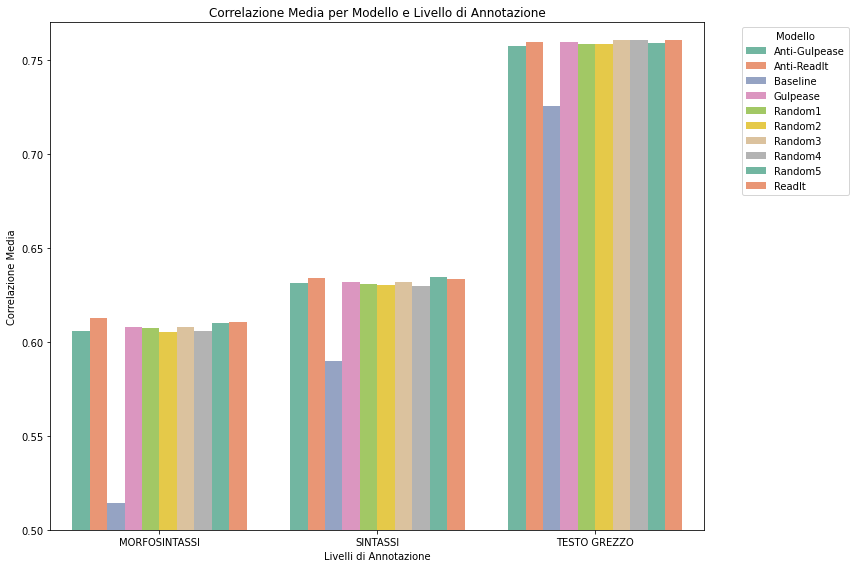

In [8]:
annotazione_mapping = {
    'n_tokens': 'TESTO GREZZO',
    'char_per_tok': 'TESTO GREZZO',
    'upos_dist_DET': 'MORFOSINTASSI',
    'upos_dist_ADV': 'MORFOSINTASSI',
    'upos_dist_PUNCT': 'MORFOSINTASSI',
    'upos_dist_NUM': 'MORFOSINTASSI',
    'upos_dist_PRON': 'MORFOSINTASSI',
    'upos_dist_ADP': 'MORFOSINTASSI',
    'upos_dist_PROPN': 'MORFOSINTASSI',
    'upos_dist_ADJ': 'MORFOSINTASSI',
    'upos_dist_VERB': 'MORFOSINTASSI',
    'upos_dist_NOUN': 'MORFOSINTASSI',
    'upos_dist_CCONJ': 'MORFOSINTASSI',
    'upos_dist_AUX': 'MORFOSINTASSI',
    'dep_dist_obj': 'SINTASSI',
    'dep_dist_nsubj': 'SINTASSI',
    'avg_links_len': 'SINTASSI',
    'max_links_len': 'SINTASSI',
    'avg_max_depth': 'SINTASSI',
    'subj_pre': 'SINTASSI',
    'subj_post': 'SINTASSI',
    'n_prepositional_chains': 'SINTASSI',
    'avg_prepositional_chain_len': 'SINTASSI',
    'avg_verb_edges': 'SINTASSI',
    'avg_subordinate_chain_len': 'SINTASSI',
    'subordinate_proposition_dist': 'SINTASSI'
}

feature_to_category = {
    'n_tokens': 'RawText',
    'char_per_tok': 'RawText',
    'upos_dist_DET': 'POS',
    'upos_dist_ADV': 'POS',
    'upos_dist_PUNCT': 'POS',
    'upos_dist_NUM': 'POS',
    'upos_dist_PRON': 'POS',
    'upos_dist_ADP': 'POS',
    'upos_dist_PROPN': 'POS',
    'upos_dist_ADJ': 'POS',
    'upos_dist_VERB': 'POS',
    'upos_dist_NOUN': 'POS',
    'upos_dist_CCONJ': 'POS',
    'upos_dist_AUX': 'POS',
    'avg_verb_edges': 'VerbPredicate',
    'avg_links_len': 'TreeStructure',
    'max_links_len': 'TreeStructure',
    'avg_max_depth': 'TreeStructure',
    'n_prepositional_chains': 'TreeStructure',
    'avg_prepositional_chain_len': 'TreeStructure',
    'subj_pre': 'Order',
    'subj_post': 'Order',
    'dep_dist_nsubj': 'SyntacticDep',
    'dep_dist_obj': 'SyntacticDep',
    'avg_subordinate_chain_len': 'Subord',
    'subordinate_proposition_dist': 'Subord'
    # Aggiungi tutte le altre associazioni necessarie
}

# Aggiungi il livello di annotazione al dataframe
data['annotazione'] = data['ling_feature'].map(annotazione_mapping)
data["categoria"] = data['ling_feature'].map(feature_to_category)

# Raggruppa per modello e annotazione, calcola la correlazione media
grouped_data = data.groupby(['model', 'annotazione'])['corr'].mean().reset_index()

# Creazione del grafico a barre raggruppato usando Seaborn
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(data['model'].unique()))  # Usa una palette di colori distinti
sns.barplot(x='annotazione', y='corr', hue='model', data=grouped_data, palette=palette)

# Aggiustamenti al grafico
plt.xlabel('Livelli di Annotazione')
plt.ylabel('Correlazione Media')
plt.title('Correlazione Media per Modello e Livello di Annotazione')
plt.xticks(rotation=0)  # Rotazione delle etichette se necessario
plt.ylim(0.5, 0.77)  # Restrizione dell'intervallo dell'asse y per evidenziare meglio le variazioni
plt.legend(title='Modello', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()

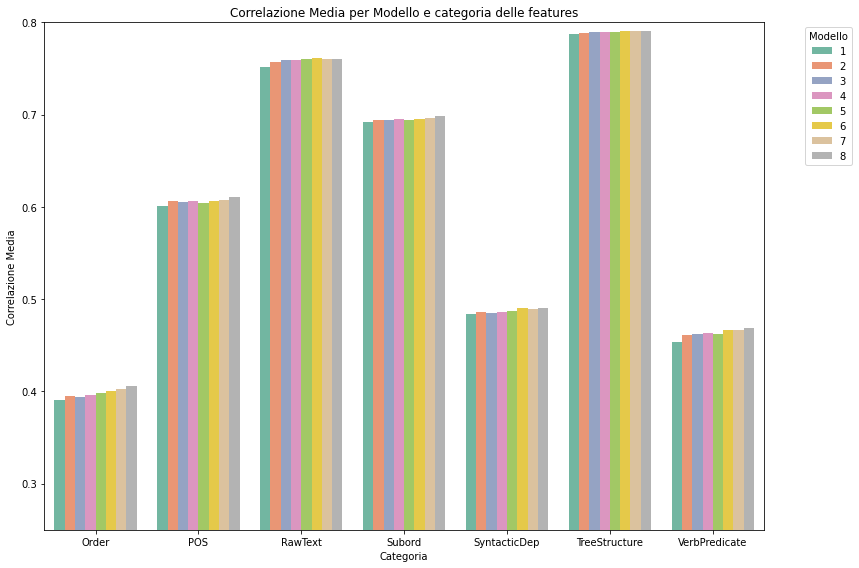

In [10]:
grouped_data = data.groupby(['layer', 'categoria'])['corr'].mean().reset_index()
# Creazione del grafico a barre raggruppato usando Seaborn
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2", len(data['model'].unique()))  # Usa una palette di colori distinti
sns.barplot(x='categoria', y='corr', hue='layer', data=grouped_data, palette=palette)

# Aggiustamenti al grafico
plt.xlabel('Categoria')
plt.ylabel('Correlazione Media')
plt.title('Correlazione Media per Modello e categoria delle features')
plt.xticks(rotation=0)  # Rotazione delle etichette se necessario
plt.ylim(0.25, 0.8)  # Restrizione dell'intervallo dell'asse y per evidenziare meglio le variazioni
plt.legend(title='Modello', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.tight_layout()
plt.show()

In [11]:
data.head()

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963,TESTO GREZZO,RawText
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429,TESTO GREZZO,RawText
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339,TESTO GREZZO,RawText
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725,TESTO GREZZO,RawText
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231,TESTO GREZZO,RawText


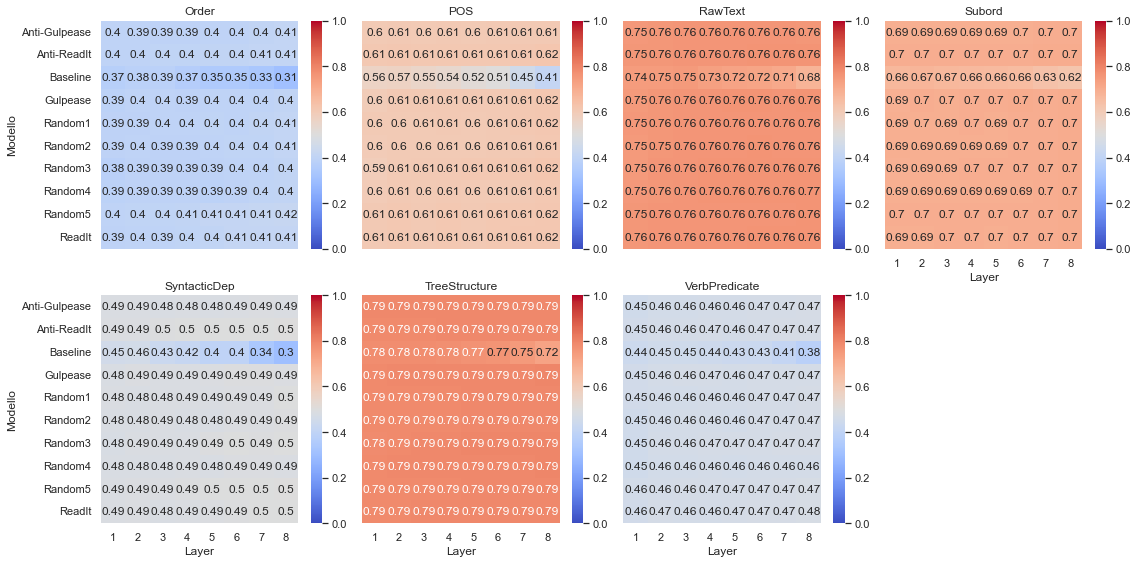

In [29]:
df_grouped = data.groupby(['model', 'layer', 'categoria'])['corr'].mean().reset_index()

# Usa FacetGrid per creare una griglia di heatmap per ogni feature linguistica
g = sns.FacetGrid(df_grouped, col="categoria", col_wrap=4, height=4)

# Mappiamo i dati su una heatmap. Si usa pivot per strutturare correttamente i dati
g.map_dataframe(lambda data, color: sns.heatmap(
    data.pivot("model", "layer", "corr"),
    annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1))

g.set_axis_labels("Layer", "Modello")
g.set_titles(col_template="{col_name}")
plt.show()

In [7]:
categorie = data["categoria"].unique()
print(categorie)

['RawText' 'POS' 'TreeStructure' 'SyntacticDep' 'Order' 'Subord'
 'VerbPredicate']


In [24]:
sns.set_theme(rc={'figure.figsize':(11.7,10)})

In [25]:



for categoria in categorie: 
    df_grouped = data[data["categoria"]==categoria].groupby(['model', 'layer'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', hue='model', data=df_grouped[df_grouped['model'] != 'Baseline'], marker='o')
    plot.set(xlabel=f'Layer', ylabel=f'Correlation')
    plot.set_title(f"Correlazioni medie dei modelli attraverso i layer per la categoria di features {categoria}")
    plot.legend(title="Modello", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/corr-layer-{categoria}")
    plt.clf()


<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [8]:
pos_features = data[data["categoria"]=="POS"]["ling_feature"].unique()
print(pos_features)


['upos_dist_DET' 'upos_dist_ADV' 'upos_dist_PUNCT' 'upos_dist_NUM'
 'upos_dist_PRON' 'upos_dist_ADP' 'upos_dist_PROPN' 'upos_dist_ADJ'
 'upos_dist_VERB' 'upos_dist_NOUN' 'upos_dist_CCONJ' 'upos_dist_AUX']


In [34]:
for pos in pos_features:
    df_grouped = data[data["model"]!= "Baseline"]
    df_grouped = data[data["ling_feature"]==pos].groupby(['model', 'layer', 'ling_feature'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', hue="model", data=df_grouped, marker='o')
    plot.set(xlabel=f'Layer', ylabel=f'Correlation')
    plot.set_title(f"{pos}", fontsize=15)
    #plot.legend(title="Part of Speech", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    #plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/pos/spazio_{pos}", bbox_inches="tight")
    plt.clf()

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [21]:
for pos in pos_features:
    df_grouped = data[data["model"]!="Baseline"]
    df_grouped = df_grouped[df_grouped["ling_feature"]==pos].groupby(['model', 'layer', 'ling_feature'])['corr'].mean().reset_index()
    plt.figure(figsize=(12, 8))
    plot = sns.lineplot(x='layer', y='corr', hue="model", data=df_grouped, marker='o')
    plot.set(xlabel=f'Layer', ylabel=f'Correlation')
    plot.set_title(f"{pos}", fontsize=15)
    plot.legend(title="Models", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/spazio/pos_models/{pos}_models", bbox_inches="tight")
    plt.clf()
   

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [9]:
df_grouped["model"].unique()

NameError: name 'df_grouped' is not defined

In [10]:
df_grouped = data[data["layer"]==8]
df_grouped["layer"].unique()

array([8], dtype=int64)

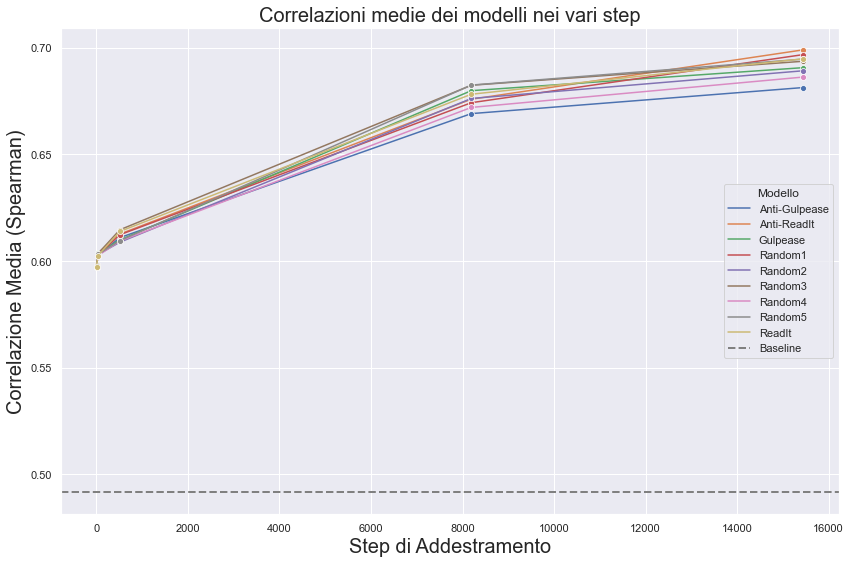

In [11]:
df_grouped = df_grouped.groupby(['model', 'step'])['corr'].mean().reset_index()
sns.set_theme(rc={'figure.figsize':(11.7,10)})


# Creazione del grafico a linee per visualizzare le correlazioni medie dei modelli nei vari step
plt.figure(figsize=(12, 8))
sns.lineplot(x='step', y='corr', hue='model', data=df_grouped[df_grouped['model'] != 'Baseline'], marker='o')

# Aggiustamenti al grafico
baseline_data = df_grouped[df_grouped['model'] == 'Baseline']
average_corr = baseline_data['corr'].mean()  
plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
plt.title('Correlazioni medie dei modelli nei vari step', fontsize=20)
plt.xlabel('Step di Addestramento', fontsize=20)
plt.ylabel('Correlazione Media (Spearman)', fontsize=20)
plt.legend(title='Modello', loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
data["ling_feature"].unique()

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

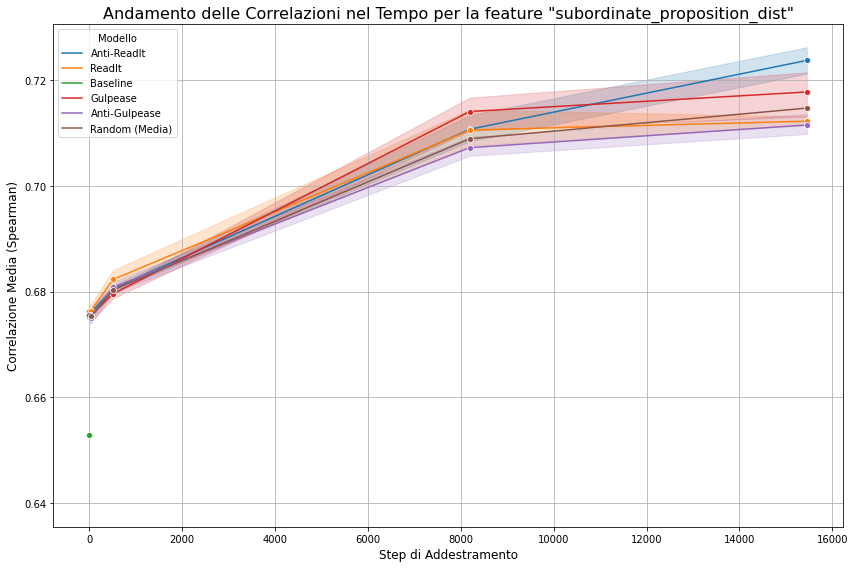

In [24]:
sel_feature = "subordinate_proposition_dist"
df_filtered = data[data['ling_feature'] == sel_feature]

# Calcola la media delle correlazioni per i modelli random
random_models = df_filtered[df_filtered['model'].str.contains('Random')]
random_mean = random_models.groupby(['step'])['corr'].mean().reset_index()
random_mean['model'] = 'Random (Media)'

# Filtra i modelli non-random
non_random_models = df_filtered[~df_filtered['model'].str.contains('Random')]

# Combina i dati dei modelli non-random con la media dei random
df_combined = pd.concat([non_random_models, random_mean])

# Creazione del grafico a linee
plt.figure(figsize=(12, 8))
sns.lineplot(x='step', y='corr', hue='model', data=df_combined, marker='o')

# Aggiustamenti al grafico
plt.title(f'Andamento delle Correlazioni nel Tempo per la feature "{sel_feature}"', fontsize=16)
plt.xlabel('Step di Addestramento', fontsize=12)
plt.ylabel('Correlazione Media (Spearman)', fontsize=12)
plt.legend(title='Modello', loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
grouped_data

,model,annotazione,corr
0,Anti-Gulpease,MORFOSINTASSI,0.605530
1,Anti-Gulpease,SINTASSI,0.631071
2,Anti-Gulpease,TESTO GREZZO,0.757495
3,Anti-ReadIt,MORFOSINTASSI,0.612560
4,Anti-ReadIt,SINTASSI,0.633798
5,Anti-ReadIt,TESTO GREZZO,0.759402
6,Baseline,MORFOSINTASSI,0.514032
7,Baseline,SINTASSI,0.589783
8,Baseline,TESTO GREZZO,0.725424
9,Gulpease,MORFOSINTASSI,0.607930


In [8]:
data["step"].unique()

array([    2,    32,   512,  8192, 15449,     0], dtype=int64)

In [9]:
filtered_df = data[ (data['step'] != 0)]
all_features =filtered_df["ling_feature"].unique()
#grouped_df = filtered_df.groupby(['model', 'step']).agg({'corr': 'mean'}).reset_index()

In [19]:
data["model"].unique()

array(['Anti-ReadIt', 'ReadIt', 'Random3', 'Random5', 'Baseline',
       'Gulpease', 'Anti-Gulpease', 'Random1', 'Random2', 'Random4'],
      dtype=object)

In [21]:
data[data["model"]=="Baseline"]

,model,step,ling_feature,layer,preds,corr
4160,Baseline,0,n_tokens,1,"[9.3236713409, 21.3845024109, 4.8495140076, 22...",0.941685
4161,Baseline,0,n_tokens,2,"[10.962392807, 23.0891017914, 7.7781953812, 24...",0.945974
4162,Baseline,0,n_tokens,3,"[6.2028808594, 19.0692062378, 4.3291797638, 19...",0.947400
4163,Baseline,0,n_tokens,4,"[5.3505096436, 23.5349273682, 5.5952129364, 23...",0.943611
4164,Baseline,0,n_tokens,5,"[8.2340583801, 24.8221855164, 10.161441803, 20...",0.939437
...,...,...,...,...,...,...
4363,Baseline,0,avg_verb_edges,4,"[2.8457300663, 3.2104251385, 1.1681096554, 2.3...",0.443612
4364,Baseline,0,avg_verb_edges,5,"[2.7159171104, 3.1476712227, 1.1512212753, 2.0...",0.434832
4365,Baseline,0,avg_verb_edges,6,"[3.1815719604, 3.1751627922, 1.0648701191, 2.2...",0.433208
4366,Baseline,0,avg_verb_edges,7,"[1.9589049816, 2.754326582, 1.4480955601, 2.31...",0.410758


In [24]:
media_corr = data.groupby(['model'])['corr'].mean()


In [25]:
media_corr_sorted = media_corr.sort_values(ascending=False)

In [27]:
randoms = [0.632632, 0.630771, 0.629942, 0.628772, 0.628740]
randoms_mean = np.mean(randoms)

In [28]:
randoms_mean

0.6301713999999999

In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [26]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [ ]:
print(media_corr_sorted)

model
Anti-ReadIt      0.633658
Random5          0.632632
ReadIt           0.632616
Random3          0.630771
Gulpease         0.630682
Random1          0.629942
Anti-Gulpease    0.629008
Random4          0.628772
Random2          0.628740
Baseline         0.565255
Name: corr, dtype: float64


In [29]:
all_features[0]

'n_tokens'

In [16]:
all_features

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

In [17]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria


In [18]:
filtered_df = data[data["layer"]==8]
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
7,Anti-ReadIt,2,n_tokens,8,"[14.4033374786, 29.4192523956, 11.7669906616, ...",0.933388,TESTO GREZZO,RawText
15,Anti-ReadIt,2,char_per_tok,8,"[4.6439027786, 4.7296237946, 4.8726744652, 5.7...",0.469342,TESTO GREZZO,RawText
23,Anti-ReadIt,2,upos_dist_DET,8,"[20.6519241333, 10.3793306351, 12.4136819839, ...",0.733064,MORFOSINTASSI,POS
31,Anti-ReadIt,2,upos_dist_ADV,8,"[9.6116962433, 8.1524143219, 5.0510458946, 1.2...",0.487406,MORFOSINTASSI,POS
39,Anti-ReadIt,2,upos_dist_PUNCT,8,"[11.8426399231, 14.2073669434, 6.6567630768, 1...",0.810484,MORFOSINTASSI,POS
...,...,...,...,...,...,...,...,...
9535,Random4,15449,n_prepositional_chains,8,"[-0.450345397, 1.1909102201, 1.3454140425, 1.2...",0.794534,SINTASSI,TreeStructure
9543,Random4,15449,avg_prepositional_chain_len,8,"[0.0481338501, 0.7719969749, 0.6624885798, 1.0...",0.749710,SINTASSI,TreeStructure
9551,Random4,15449,avg_subordinate_chain_len,8,"[0.1367077827, 0.7952861786, 0.3309471607, 0.4...",0.736451,SINTASSI,Subord
9559,Random4,15449,subordinate_proposition_dist,8,"[1.564365387, 41.5217437744, 16.5145149231, 29...",0.720668,SINTASSI,Subord


In [23]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria


In [38]:
sns.set_theme(rc={'figure.figsize':(11.7,10)})
filtered_df = data[data["layer"]==8]
all_features =data["ling_feature"].unique()

In [39]:
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
7,Anti-ReadIt,2,n_tokens,8,"[14.4033374786, 29.4192523956, 11.7669906616, ...",0.933388,TESTO GREZZO,RawText
15,Anti-ReadIt,2,char_per_tok,8,"[4.6439027786, 4.7296237946, 4.8726744652, 5.7...",0.469342,TESTO GREZZO,RawText
23,Anti-ReadIt,2,upos_dist_DET,8,"[20.6519241333, 10.3793306351, 12.4136819839, ...",0.733064,MORFOSINTASSI,POS
31,Anti-ReadIt,2,upos_dist_ADV,8,"[9.6116962433, 8.1524143219, 5.0510458946, 1.2...",0.487406,MORFOSINTASSI,POS
39,Anti-ReadIt,2,upos_dist_PUNCT,8,"[11.8426399231, 14.2073669434, 6.6567630768, 1...",0.810484,MORFOSINTASSI,POS
...,...,...,...,...,...,...,...,...
9535,Random4,15449,n_prepositional_chains,8,"[-0.450345397, 1.1909102201, 1.3454140425, 1.2...",0.794534,SINTASSI,TreeStructure
9543,Random4,15449,avg_prepositional_chain_len,8,"[0.0481338501, 0.7719969749, 0.6624885798, 1.0...",0.749710,SINTASSI,TreeStructure
9551,Random4,15449,avg_subordinate_chain_len,8,"[0.1367077827, 0.7952861786, 0.3309471607, 0.4...",0.736451,SINTASSI,Subord
9559,Random4,15449,subordinate_proposition_dist,8,"[1.564365387, 41.5217437744, 16.5145149231, 29...",0.720668,SINTASSI,Subord


In [44]:
for feature in all_features:
    filtered_df = data[data["ling_feature"]==feature]
    filtered_df = filtered_df[filtered_df["layer"]==8]
    sns.lineplot(data=filtered_df[filtered_df["model"]!="Baseline"], x='step', y='corr', hue="model", marker='o', ci=None)
    # baseline_data = filtered_df[filtered_df['model'] == 'Baseline']
    # average_corr = baseline_data['corr'].mean()  
    # plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
    plt.xlabel('Training steps', fontsize=20)
    plt.ylabel('Spearman correlation', fontsize=20)
    plt.title(f"Performance nei probing task sulla feature {feature}, fontsize=20")
    plt.legend()
    file_path = (F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-feature-LASTLAYER/corr-checkpoint-{feature}-2.png")
    plt.savefig(file_path)
    plt.clf()


<Figure size 842.4x720 with 0 Axes>

In [37]:
filtered_df = filtered_df[filtered_df["ling_feature"]=="upos_dist_VERB"]
filtered_df

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
87,Anti-ReadIt,2,upos_dist_VERB,8,"[13.8639411926, 12.4632282257, 8.1858673096, 4...",0.479722,MORFOSINTASSI,POS
295,Anti-ReadIt,32,upos_dist_VERB,8,"[14.2049713135, 11.5277175903, 8.2748184204, 3...",0.487418,MORFOSINTASSI,POS
503,Anti-ReadIt,512,upos_dist_VERB,8,"[11.1635074615, 10.8046627045, 6.6415576935, 4...",0.515754,MORFOSINTASSI,POS
711,Anti-ReadIt,8192,upos_dist_VERB,8,"[9.5184936523, 10.3409748077, 11.1151027679, 0...",0.620425,MORFOSINTASSI,POS
919,Anti-ReadIt,15449,upos_dist_VERB,8,"[13.4885320663, 11.0195407867, 7.8142399788, 4...",0.686683,MORFOSINTASSI,POS
1127,ReadIt,2,upos_dist_VERB,8,"[12.5979499817, 12.3406772614, 8.2761497498, 4...",0.479292,MORFOSINTASSI,POS
1335,ReadIt,32,upos_dist_VERB,8,"[13.4037675858, 11.1018543243, 8.4921588898, 3...",0.487860,MORFOSINTASSI,POS
1543,ReadIt,512,upos_dist_VERB,8,"[11.3456192017, 10.0392990112, 6.2817020416, 4...",0.519521,MORFOSINTASSI,POS
1751,ReadIt,8192,upos_dist_VERB,8,"[9.9793319702, 10.7765426636, 9.740234375, 3.9...",0.632602,MORFOSINTASSI,POS
1959,ReadIt,15449,upos_dist_VERB,8,"[9.2429294586, 11.8337535858, 8.148856163, 3.1...",0.674924,MORFOSINTASSI,POS


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


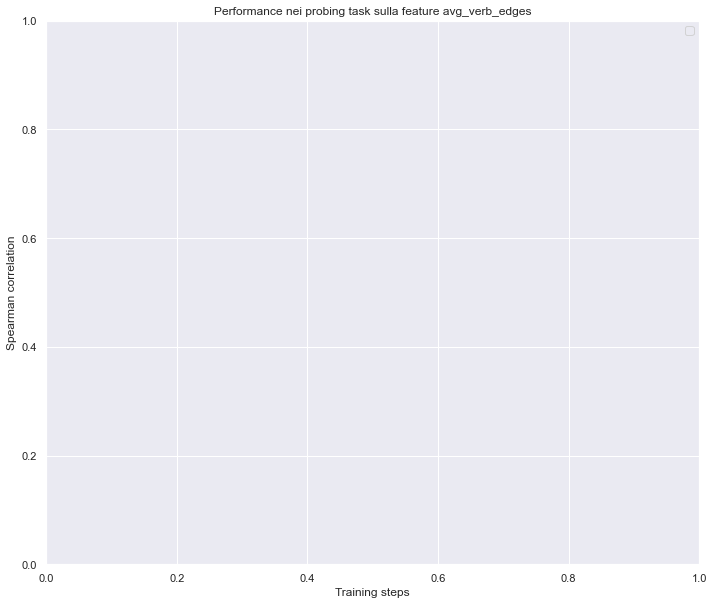

In [29]:
filtered_df = filtered_df[filtered_df["ling_feature"]=="n_tokens"]
sns.lineplot(data=filtered_df[filtered_df["model"]!="Baseline"], x='step', y='corr', hue="model", marker='o', ci=None)
# baseline_data = filtered_df[filtered_df['model'] == 'Baseline']
# average_corr = baseline_data['corr'].mean()  
# plt.axhline(y=average_corr, color='grey', linestyle='--', linewidth=2, label='Baseline')
plt.xlabel('Training steps')
plt.ylabel('Spearman correlation')
plt.title(f"Performance nei probing task sulla feature {feature}")
plt.legend()
plt.show()
file_path = (F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-feature-LASTLAYER/corr-checkpoint-{feature}-2.png")
# plt.savefig(file_path)
# plt.clf()


In [29]:
filtered_df.head()

,model,step,ling_feature,layer,preds,corr,annotazione,categoria
0,Anti-ReadIt,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ...",0.929963,TESTO GREZZO,RawText
1,Anti-ReadIt,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2...",0.931429,TESTO GREZZO,RawText
2,Anti-ReadIt,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ...",0.931339,TESTO GREZZO,RawText
3,Anti-ReadIt,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ...",0.931725,TESTO GREZZO,RawText
4,Anti-ReadIt,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ...",0.932231,TESTO GREZZO,RawText


In [26]:
filtered_df = data[(data['step'] != 0)]
all_models =filtered_df["model"].unique()
all_features = filtered_df["ling_feature"].unique()
all_categories = filtered_df["categoria"].unique

In [31]:

sns.set_theme(rc={'figure.figsize':(14,12)})
palette1 = sns.color_palette("tab20", 20)
palette2 = sns.color_palette("Set3", 6)
combined_palette = palette1 + palette2

for model in all_models:
    filtered_df = data[ (data['model'] == model)]
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue="categoria", marker='o', ci=None)
    plot.set(xlabel=f'Training steps', ylabel=f'Correlation')
    plot.set_title(f"Performance nei probing task del modello {model}")
    plot.legend(title="Categoria", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{model}")
    plt.clf()


<Figure size 1008x864 with 0 Axes>

In [ ]:
for category in all_categories:
    plot = sns.lineplot(data=filtered_df, x='step', y='corr', hue=category, marker='o', ci=None, palette=combined_palette)
    plot.set(xlabel=f'Training steps', ylabel=f'Correlation')
    plot.set_title(f"Performance nei probing task del modello {model}")
    plot.legend(title="Model", loc='center left', bbox_to_anchor=(1, 0.5))  # Legenda a destra
    plt.subplots_adjust(right=0.8)  # Sposta il limite destro per far spazio alla legenda
    fig = plot.get_figure()
    fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/grafici/tempo/corr-checkpoint-{model}")
    plt.clf()


In [16]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})


plot = sns.scatterplot(x, y, x="N tokens reali", y="N tokens predetti")
plot.set(xlabel='n tokens reali', ylabel='n tokens predetti')
plot.set_title(f"CORRELAZIONE\n{res}")
fig = plot.get_figure()
fig.savefig(F"C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/models/{training_id}/probing_results/prova.png")


NameError: name 'x' is not defined

In [28]:
checkpoints = data["step"].unique()
checkpoints

array([    2,    32,   512,  8192, 15449], dtype=int64)

In [29]:
features = data["ling_feature"].unique()
features

array(['n_tokens', 'char_per_tok', 'upos_dist_DET', 'upos_dist_ADV',
       'upos_dist_PUNCT', 'upos_dist_NUM', 'upos_dist_PRON',
       'upos_dist_ADP', 'upos_dist_PROPN', 'upos_dist_ADJ',
       'upos_dist_VERB', 'upos_dist_NOUN', 'upos_dist_CCONJ',
       'upos_dist_AUX', 'avg_links_len', 'max_links_len', 'avg_max_depth',
       'dep_dist_obj', 'dep_dist_nsubj', 'subj_pre', 'subj_post',
       'n_prepositional_chains', 'avg_prepositional_chain_len',
       'avg_subordinate_chain_len', 'subordinate_proposition_dist',
       'avg_verb_edges'], dtype=object)

In [30]:
layers = data["layer"].unique()
layers

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
data

,model,step,ling_feature,layer,preds
0,ANTI_CURRICULUM,2,n_tokens,1,"[14.2617378235, 26.5588474274, 17.3904933929, ..."
1,ANTI_CURRICULUM,2,n_tokens,2,"[14.1514997482, 27.2879371643, 15.549747467, 2..."
2,ANTI_CURRICULUM,2,n_tokens,3,"[11.9438457489, 27.3566741943, 15.1185798645, ..."
3,ANTI_CURRICULUM,2,n_tokens,4,"[13.2122097015, 26.7883872986, 17.9085960388, ..."
4,ANTI_CURRICULUM,2,n_tokens,5,"[14.4300756454, 27.6109771729, 16.7157745361, ..."
...,...,...,...,...,...
1035,ANTI_CURRICULUM,15449,avg_verb_edges,4,"[2.4327993393, 3.550909996, 1.192373395, 2.102..."
1036,ANTI_CURRICULUM,15449,avg_verb_edges,5,"[2.542453289, 2.9933393002, 1.327378273, 2.378..."
1037,ANTI_CURRICULUM,15449,avg_verb_edges,6,"[2.3473558426, 2.9784145355, 1.5979086161, 2.1..."
1038,ANTI_CURRICULUM,15449,avg_verb_edges,7,"[2.2342386246, 3.14443326, 1.5708684921, 2.171..."


## PERPLEXITY

In [62]:
sns.set_style("darkgrid")


In [24]:
frasi10 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/pseudoppl_frasi_len10.csv")
frasi15 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/pseudoppl_frasi_len15.csv")
frasi20 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/pseudoppl_frasi_len20.csv")
frasi25 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/pseudoppl_frasi_len25.csv")
frasi30 = pd.read_csv("C:/Users/bergo/OneDrive - University of Pisa/Tesi Magistrale/perplexity/pseudoppl_frasi_len30.csv")

In [25]:
frasi_totale = pd.concat([frasi10, frasi15, frasi20, frasi25, frasi30], ignore_index=True)


In [26]:
frasi_totale["num_words"].unique()

array([10, 15, 20, 25, 30], dtype=int64)

In [27]:
frasi_totale["dataset"].unique()

array(['wiki', 'treebank'], dtype=object)

In [28]:
frasi_totale.head()

,Unnamed: 0,text,num_words,dataset,pp_gulp_c2,pp_gulp_c32,pp_gulp_c512,pp_gulp_c8192,pp_gulp_c15449,pp_antigulp_c2,...,pp_random21_c2,pp_random21_c32,pp_random21_c512,pp_random21_c8192,pp_random21_c15449,pp_random37_c2,pp_random37_c32,pp_random37_c512,pp_random37_c8192,pp_random37_c15449
0,0,Ma l'assassino è stato più veloce di lei.,10,wiki,0.000064,0.000399,0.074747,0.320007,0.339214,0.000065,...,0.000025,0.000044,0.000151,0.011130,0.011444,0.000029,0.000035,0.000209,0.010218,0.021197
1,1,"Duca di Marino, II Duca di Miraglia, VIII",10,wiki,0.000076,0.001669,0.006879,0.059059,0.062741,0.000085,...,0.000036,0.000049,0.000065,0.000095,0.000171,0.000039,0.000034,0.000033,0.000101,0.000341
2,2,Il singolo vende oltre di copie solo negli Usa.,10,wiki,0.000053,0.000302,0.079173,0.146777,0.146458,0.000068,...,0.000034,0.000151,0.115896,0.755728,0.832087,0.000037,0.000122,0.128936,0.825669,0.833484
3,3,I nuovi successi continentali (1924-1928).,10,wiki,0.000034,0.000199,0.064485,0.275995,0.305674,0.000033,...,0.000027,0.000094,0.015744,0.253251,0.210367,0.000020,0.000102,0.011319,0.332889,0.380228
4,4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",10,wiki,0.000049,0.000814,0.004991,0.032791,0.040868,0.000042,...,0.000056,0.000032,0.000050,0.007123,0.007238,0.000050,0.000042,0.000078,0.004403,0.006025


In [40]:
ppl_last = pd.DataFrame()
ppl_last["text"] = frasi_totale["text"]
ppl_last["Gulpease"] = frasi_totale["pp_gulp_c15449"]
ppl_last["Readit"] = frasi_totale["pp_readit_c15449"]
ppl_last["AntiGulpease"] = frasi_totale["pp_antigulp_c15449"]
ppl_last["AntiReadit"] = frasi_totale["pp_antireadit_c15449"]
ppl_last["Random1"] = frasi_totale["pp_random5_c15449"]
ppl_last["Random2"] = frasi_totale["pp_random18_c15449"]
ppl_last["Random3"] = frasi_totale["pp_random21_c15449"]
ppl_last["Random4"] = frasi_totale["pp_random29_c15449"]
ppl_last["Random5"] = frasi_totale["pp_random37_c15449"]
ppl_last['RandomGroup'] = ppl_last[['Random1', 'Random2', 'Random3', 'Random4', 'Random5']].mean(axis=1)



In [41]:
ppl_middle = pd.DataFrame()
ppl_middle["text"] = frasi_totale["text"]
ppl_middle["Gulpease"] = frasi_totale["pp_gulp_c8192"]
ppl_middle["Readit"] = frasi_totale["pp_readit_c8192"]
ppl_middle["AntiGulpease"] = frasi_totale["pp_antigulp_c8192"]
ppl_middle["AntiReadit"] = frasi_totale["pp_antireadit_c8192"]
ppl_middle["Random1"] = frasi_totale["pp_random5_c8192"]
ppl_middle["Random2"] = frasi_totale["pp_random18_c8192"]
ppl_middle["Random3"] = frasi_totale["pp_random21_c8192"]
ppl_middle["Random4"] = frasi_totale["pp_random29_c8192"]
ppl_middle["Random5"] = frasi_totale["pp_random37_c8192"]
ppl_middle["dataset"] = frasi_totale["dataset"]
ppl_middle["num_words"] = frasi_totale["num_words"]

In [42]:
ppl_middle['RandomGroup'] = ppl_middle[['Random1', 'Random2', 'Random3', 'Random4', 'Random5']].mean(axis=1)


In [43]:
ppl_last["dataset"] = frasi_totale["dataset"]

In [44]:
ppl_last["num_words"] = frasi_totale["num_words"]

In [45]:
ppl_last

,text,Gulpease,Readit,AntiGulpease,AntiReadit,Random1,Random2,Random3,Random4,Random5,RandomGroup,dataset,num_words
0,Ma l'assassino è stato più veloce di lei.,0.339214,0.010000,0.342826,0.022693,0.364473,0.345861,1.144378e-02,0.349633,2.119660e-02,0.218521,wiki,10
1,"Duca di Marino, II Duca di Miraglia, VIII",0.062741,0.000457,0.075270,0.000606,0.117176,0.050994,1.708432e-04,0.053777,3.406804e-04,0.044492,wiki,10
2,Il singolo vende oltre di copie solo negli Usa.,0.146458,0.734347,0.156309,0.661946,0.142284,0.151818,8.320866e-01,0.154275,8.334841e-01,0.422789,wiki,10
3,I nuovi successi continentali (1924-1928).,0.305674,0.335695,0.307261,0.289449,0.372245,0.282861,2.103668e-01,0.295385,3.802283e-01,0.308217,wiki,10
4,"Intanto, Alaric e Jenna iniziano ad uscire ins...",0.040868,0.013493,0.040484,0.006865,0.045708,0.037908,7.237718e-03,0.025979,6.024511e-03,0.024572,wiki,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"Non è escluso, dunque, che la vicenda si chiud...",0.141774,0.077504,0.142185,0.036094,0.154653,0.148425,8.140164e-02,0.142965,8.605719e-02,0.122700,treebank,30
496,"La Bbc Company, l'agenzia che organizza le dat...",0.109656,0.029208,0.119211,0.103390,0.129443,0.115367,5.868872e-02,0.107353,4.421165e-02,0.091013,treebank,30
497,Obiettivi conseguiti grazie anche alla complet...,0.132045,0.000001,0.136412,0.000002,0.143133,0.123810,9.557355e-07,0.142817,7.456048e-07,0.081952,treebank,30
498,Ma il cinismo declinò al progredire della sua ...,0.115435,0.008113,0.124418,0.013415,0.157326,0.120987,1.418186e-02,0.121603,1.638122e-02,0.086096,treebank,30


### GRAFICI PPL LENGHT

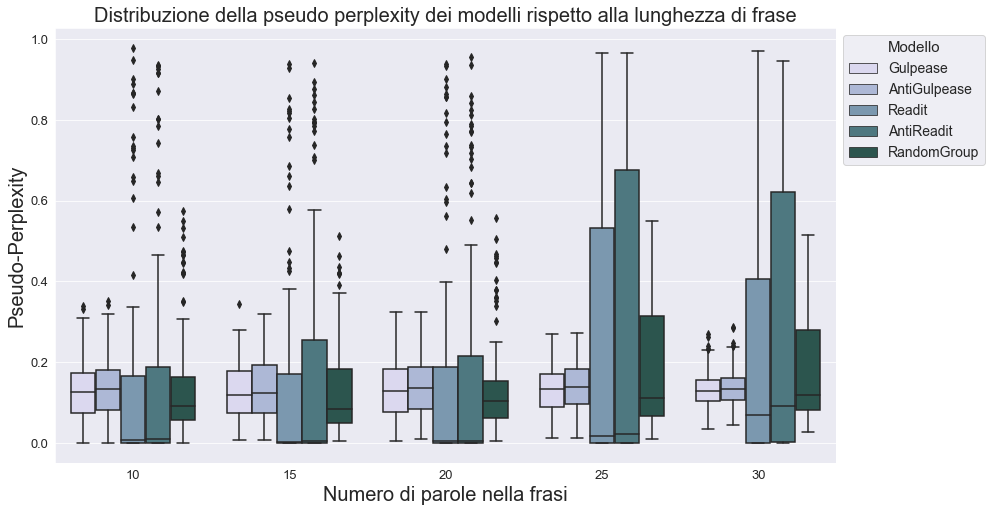

In [84]:
    # Per visualizzare la distribuzione dei valori per ogni modello rispetto a 'num_words'
plt.figure(figsize=(14, 8), facecolor='white')
my_palette = sns.cubehelix_palette(start=2)
# Usare un melt per trasformare il dataframe in un formato lungo
df_melt = pd.melt(ppl_last, id_vars=['num_words'], value_vars=['Gulpease', 'AntiGulpease', 'Readit', 'AntiReadit', 'RandomGroup'])

# Creare un boxplot per ogni modello rispetto al numero di parole
sns.boxplot(x='num_words', y='value', hue='variable', data=df_melt, palette=my_palette)

# Aggiustamenti del grafico
plt.title('Distribuzione della pseudo perplexity dei modelli rispetto alla lunghezza di frase', fontsize = 20)
plt.xlabel('Numero di parole nella frasi', fontsize = 20)
plt.ylabel('Pseudo-Perplexity', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Modello', bbox_to_anchor=(1, 1), loc='upper left', fontsize=14, title_fontsize=15)


plt.show()

In [49]:
df_grouped = ppl_last[["Gulpease", "AntiGulpease", "Readit", "AntiReadit", "RandomGroup", "num_words"]].groupby('num_words').mean()


In [51]:
df_grouped.transpose()

num_words,10,15,20,25,30
Gulpease,0.136035,0.128384,0.131627,0.132457,0.134129
AntiGulpease,0.140186,0.131700,0.134801,0.137890,0.138381
Readit,0.166549,0.153116,0.170881,0.258978,0.238345
AntiReadit,0.165162,0.170723,0.184896,0.279935,0.283607
RandomGroup,0.146895,0.134846,0.144615,0.181509,0.175603


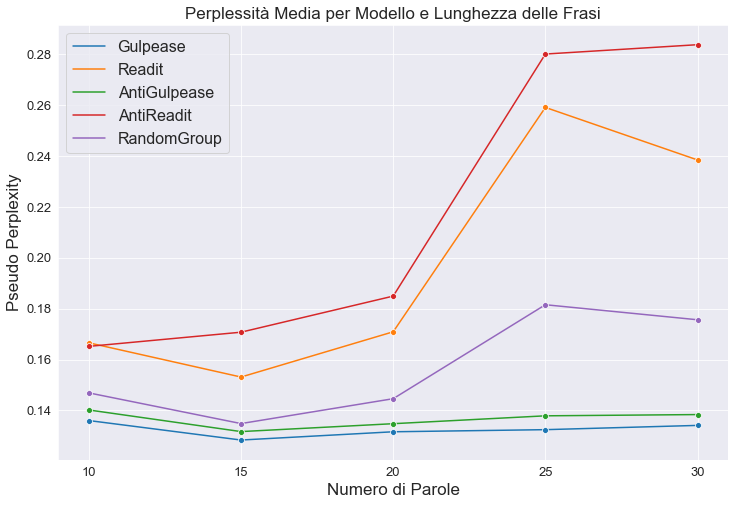

In [81]:
df_melt = pd.melt(ppl_last, id_vars=['num_words'], value_vars=['Gulpease', 'Readit', 'AntiGulpease', 'AntiReadit', 'RandomGroup'])

# Creiamo un lineplot con num_words come asse x e la media di perplessità come asse y
plt.figure(figsize=(12, 8))
sns.lineplot(x='num_words', y='value', hue='variable', data=df_melt, marker='o', ci=None)

# Aggiustamenti del grafico
plt.title('Perplessità Media per Modello e Lunghezza delle Frasi', fontsize=17)
plt.xlabel('Numero di Parole', fontsize = 17)
plt.ylabel('Pseudo Perplexity', fontsize=17)
plt.xticks([10, 15, 20, 25, 30], fontsize=13)
plt.yticks(fontsize=13)  # Mostrare solo i valori specifici di num_words
plt.grid(True)
plt.legend(fontsize=16)

# Mostriamo il grafico
plt.show()

### GRAFICI PPL DATASET